写在前面

本文需要线性规划基础

第三章核心问题是在约束条件下求最大值问题，目标函数和约束条件都是线性的，其实是线性规划问题。

In [5]:
# Minimize: c^T x
# Subject to: A_ub x <= b_ub
# A_eq * x == b_eq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog

C=[-5,-4]
A = [[100,125]]
b = [50000]
x1_bound = (0,400)
x2_bound = (0,300)

res = linprog(C,A_ub = A, b_ub = b,bounds = (x1_bound,x2_bound))

In [6]:
res

     fun: -2320.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([  0.,   0., 220.])
  status: 0
 success: True
       x: array([400.,  80.])

That means we need to set x1= 400 x2=80 to maximize the final result(2320), 达到数学上的最优，但同时需要结合实际情况来决策

结合业务来看：

In [17]:
df = pd.read_excel('C:/Users/tianjiayang/data analysisi practice/historical_sales_data.xls', names= ['Month', 'Year', 'Fish', 'Ducks', 'Total'])

In [18]:
df.head()

,Month,Year,Fish,Ducks,Total
0,J,2006,71,25,96
1,F,2006,76,29,105
2,M,2006,73,29,102
3,A,2006,81,29,110
4,M,2006,83,32,115


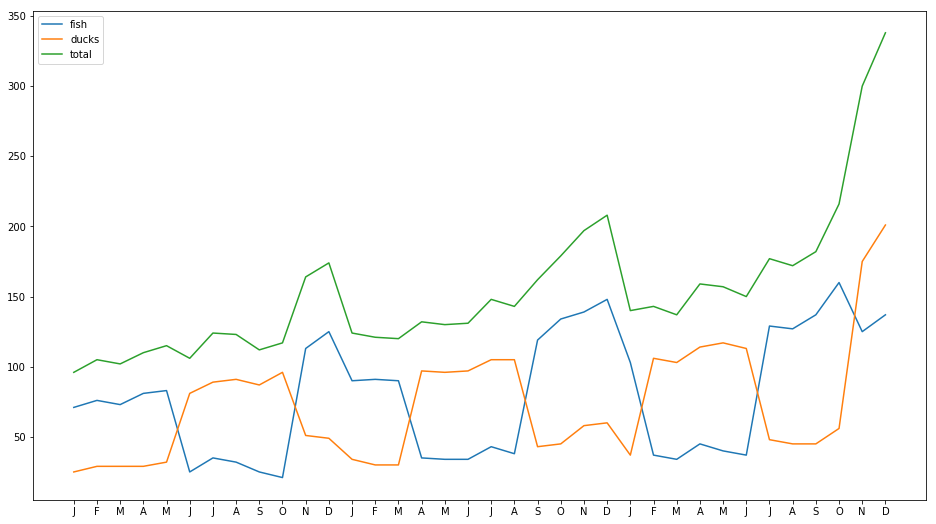

In [19]:
fig = plt.figure(figsize= (16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df.Fish, label= 'fish')
ax.plot(df.index, df.Ducks, label= 'ducks')
ax.plot(df.index, df.Total, label= 'total')

ax.legend()

ax.set_xticks(df.index)
l = ax.set_xticklabels(df.Month)

增加约束条件
12月份之后的1月份销量均会下降，比如橡皮鸭最多只能售卖150只，橡皮鱼最多只能售卖100只

In [20]:
c = [-5, -4]
A = [[100, 125]]
b = [50000]
x1_bounds = (0, 150)
x2_bounds = (0, 100)

res = linprog(c, A_ub=A, b_ub=b, bounds=(x1_bounds, x2_bounds))
res

     fun: -1150.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([22500.,     0.,     0.])
  status: 0
 success: True
       x: array([150., 100.])